## miRNA Sequencing Classification With Machine Learning
### Author: `Bodhayan Prasad`
Apply a classification model that can predict a miRNA's function based on it's sequence of the coding sequence alone.

In [1]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
pd.set_option('display.float_format', lambda x:'%.2f' % x)

In [3]:
rnaseq = pd.read_table('rnaseq.tab')
rnaseq.head()

,id_mature,miRBase_mature_miRNA_ID,id_hairpin,miRBase_precursor_miRNA_ID,Type,norm_mean_MDCK,norm_mean_MDCK-Ras,Fold_Change,Log2_Fold_Change,p_value,p_adjusted_value,more,sig,bin,class
0,cfa-let-7a,MIMAT0006594,cfa-let-7a-1,MI0007989,Canis,108436.76,144187.05,1.33,0.41,0.39,0.53,1,0,10,1
1,cfa-let-7a,MIMAT0006594,cfa-let-7a-2,MI0010328,Canis,108768.53,144483.13,1.33,0.41,0.39,0.53,1,0,10,1
2,cfa-let-7c,MIMAT0006669,cfa-let-7c,MI0008076,Canis,367.45,491.74,1.34,0.42,0.61,0.73,1,0,10,1
3,cfa-let-7e,MIMAT0006608,cfa-let-7e,MI0008004,Canis,8311.05,28849.52,3.47,1.80,0.00,0.01,1,1,11,3
4,cfa-let-7f,MIMAT0006610,cfa-let-7f,MI0008006,Canis,254701.36,277863.24,1.09,0.13,0.85,0.90,1,0,10,1


In [4]:
rnaseq.shape

(189, 15)

[53 47 39 50]


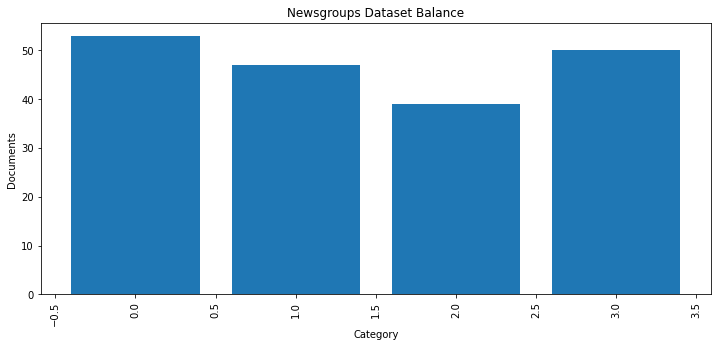

In [5]:
bincount = np.bincount(rnaseq['class'])
print(bincount)
plt.figure(figsize=(12,5))
plt.bar([0,1,2,3], bincount)
plt.xticks(rotation=90)
plt.xlabel("Category")
plt.ylabel("Documents")
plt.title("Newsgroups Dataset Balance")
plt.show()

In [6]:
hairpin = pd.read_table('hairpin.tab')
hairpin.head()

,id_hairpin,seq_hairpin
0,cel-let-7,UACACUGUGGAUCCGGUGAGGUAGUAGGUUGUAUAGUUUGGAAUAU...
1,cel-lin-4,AUGCUUCCGGCCUGUUCCCUGAGACCUCAAGUGUGAGUGUACUAUU...
2,cel-mir-1,AAAGUGACCGUACCGAGCUGCAUACUUCCUUACAUGCCCAUACUAU...
3,cel-mir-2,UAAACAGUAUACAGAAAGCCAUCAAAGCGGUGGUUGAUGUGUUGCA...
4,cel-mir-34,CGGACAAUGCUCGAGAGGCAGUGUGGUUAGCUGGUUGCAUAUUUCC...


In [7]:
mature = pd.read_table('mature.tab')
mature.head()

,id_mature,seq_mature
0,cel-let-7-5p,UGAGGUAGUAGGUUGUAUAGUU
1,cel-let-7-3p,CUAUGCAAUUUUCUACCUUACC
2,cel-lin-4-5p,UCCCUGAGACCUCAAGUGUGA
3,cel-lin-4-3p,ACACCUGGGCUCUCCGGGUACC
4,cel-miR-1-5p,CAUACUUCCUUACAUGCCCAUA


In [8]:
df_hairpin=pd.merge(hairpin, rnaseq)
df_hairpin.head()

,id_hairpin,seq_hairpin,id_mature,miRBase_mature_miRNA_ID,miRBase_precursor_miRNA_ID,Type,norm_mean_MDCK,norm_mean_MDCK-Ras,Fold_Change,Log2_Fold_Change,p_value,p_adjusted_value,more,sig,bin,class
0,cfa-mir-429,AGCCUGCUGAUGGGCGUCUUACCAGACACGGUUAGAUCUGGGUUCU...,cfa-miR-429,MIMAT0001539,MI0001644,Canis,10044.39,1796.64,0.18,-2.48,0.00,0.00,0,1,1,2
1,cfa-mir-365-2,AGAGUGUUCAAGGACAGCAAGAAAAAUGAGGGACUUUCAGGGGCAG...,cfa-miR-365,MIMAT0001540,MI0001647,Canis,1304.97,3422.40,2.62,1.39,0.00,0.00,1,1,11,3
2,cfa-mir-450a,GAAAGAUGCUGAACUGUUUUUGCGAUGUGUUCCUAAUAUGCAGUAU...,cfa-miR-450a,MIMAT0001548,MI0001655,Canis,266.21,149.17,0.56,-0.84,0.03,0.07,0,0,0,0
3,cfa-mir-365-1,ACCGCAGGGAAAAUGAGGGACUUUUGGGGGCAGAUGUGUUUCCAUU...,cfa-miR-365,MIMAT0001540,MI0001657,Canis,1304.97,3422.40,2.62,1.39,0.00,0.00,1,1,11,3
4,cfa-let-7a-1,UGAGGUAGUAGGUUGUAUAGUUUGGGGCUCUGCCCUGCUCUGGGUA...,cfa-let-7a,MIMAT0006594,MI0007989,Canis,108436.76,144187.05,1.33,0.41,0.39,0.53,1,0,10,1


In [9]:
df_hairpin.shape

(189, 16)

In [10]:
df_mature=pd.merge(mature, rnaseq)
df_mature.head()

,id_mature,seq_mature,miRBase_mature_miRNA_ID,id_hairpin,miRBase_precursor_miRNA_ID,Type,norm_mean_MDCK,norm_mean_MDCK-Ras,Fold_Change,Log2_Fold_Change,p_value,p_adjusted_value,more,sig,bin,class
0,cfa-miR-429,UAAUACUGUCUGGUAAUGCCGU,MIMAT0001539,cfa-mir-429,MI0001644,Canis,10044.39,1796.64,0.18,-2.48,0.00,0.00,0,1,1,2
1,cfa-miR-365,UAAUGCCCCUAAAAAUCCUUAU,MIMAT0001540,cfa-mir-365-1,MI0001657,Canis,1304.97,3422.40,2.62,1.39,0.00,0.00,1,1,11,3
2,cfa-miR-365,UAAUGCCCCUAAAAAUCCUUAU,MIMAT0001540,cfa-mir-365-2,MI0001647,Canis,1304.97,3422.40,2.62,1.39,0.00,0.00,1,1,11,3
3,cfa-miR-450a,UUUUUGCGAUGUGUUCCUAAUA,MIMAT0001548,cfa-mir-450a,MI0001655,Canis,266.21,149.17,0.56,-0.84,0.03,0.07,0,0,0,0
4,cfa-let-7a,UGAGGUAGUAGGUUGUAUAGUU,MIMAT0006594,cfa-let-7a-1,MI0007989,Canis,108436.76,144187.05,1.33,0.41,0.39,0.53,1,0,10,1


In [11]:
df_mature.shape

(189, 16)

In [12]:
hairpin_data=df_hairpin[['seq_hairpin','sig']]
hairpin_data.columns = ['sequence','class']
hairpin_data.head()

,sequence,class
0,AGCCUGCUGAUGGGCGUCUUACCAGACACGGUUAGAUCUGGGUUCU...,1
1,AGAGUGUUCAAGGACAGCAAGAAAAAUGAGGGACUUUCAGGGGCAG...,1
2,GAAAGAUGCUGAACUGUUUUUGCGAUGUGUUCCUAAUAUGCAGUAU...,0
3,ACCGCAGGGAAAAUGAGGGACUUUUGGGGGCAGAUGUGUUUCCAUU...,1
4,UGAGGUAGUAGGUUGUAUAGUUUGGGGCUCUGCCCUGCUCUGGGUA...,0


In [13]:
hairpin_data['A'] = hairpin_data.apply(lambda row: row.sequence.count('A')/len(row.sequence), axis=1)
hairpin_data['U'] = hairpin_data.apply(lambda row: row.sequence.count('U')/len(row.sequence), axis=1)
hairpin_data['G'] = hairpin_data.apply(lambda row: row.sequence.count('G')/len(row.sequence), axis=1)
hairpin_data['C'] = hairpin_data.apply(lambda row: row.sequence.count('C')/len(row.sequence), axis=1)
hairpin_data['GC'] = hairpin_data.apply(lambda row: row.G+row.C, axis=1)
hairpin_data.head()

/var/folders/91/plww02hn02dcgq2mr321qy9w0000gn/T/ipykernel_20628/3153881646.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hairpin_data['A'] = hairpin_data.apply(lambda row: row.sequence.count('A')/len(row.sequence), axis=1)
/var/folders/91/plww02hn02dcgq2mr321qy9w0000gn/T/ipykernel_20628/3153881646.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hairpin_data['U'] = hairpin_data.apply(lambda row: row.sequence.count('U')/len(row.sequence), axis=1)
/var/folders/91/plww02hn02dcgq2mr321qy9w0000gn/T/ipy

,sequence,class,A,U,G,C,GC
0,AGCCUGCUGAUGGGCGUCUUACCAGACACGGUUAGAUCUGGGUUCU...,1,0.18,0.31,0.28,0.24,0.52
1,AGAGUGUUCAAGGACAGCAAGAAAAAUGAGGGACUUUCAGGGGCAG...,1,0.27,0.28,0.26,0.19,0.45
2,GAAAGAUGCUGAACUGUUUUUGCGAUGUGUUCCUAAUAUGCAGUAU...,0,0.27,0.37,0.23,0.12,0.35
3,ACCGCAGGGAAAAUGAGGGACUUUUGGGGGCAGAUGUGUUUCCAUU...,1,0.26,0.29,0.22,0.23,0.45
4,UGAGGUAGUAGGUUGUAUAGUUUGGGGCUCUGCCCUGCUCUGGGUA...,0,0.17,0.36,0.26,0.20,0.46


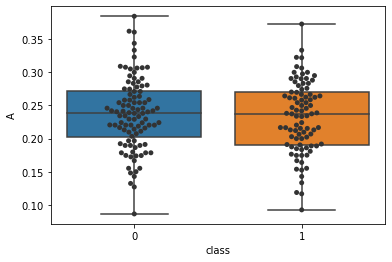

In [14]:
import seaborn as sns
ax = sns.boxplot(x="class", y="A", data=hairpin_data, whis=np.inf, )
ax = sns.swarmplot(x="class", y="A", data=hairpin_data, color=".2")

In [15]:
hairpin_data.groupby('class').mean()

,A,U,G,C,GC
class,,,,,
0,0.24,0.29,0.25,0.22,0.47
1,0.23,0.29,0.26,0.22,0.48


In [16]:
hairpin_data.groupby('class').std()

,A,U,G,C,GC
class,,,,,
0,0.05,0.06,0.05,0.05,0.09
1,0.05,0.06,0.05,0.05,0.09


In [17]:
from scipy.stats import ttest_ind
ttest_ind(*hairpin_data.groupby('class')['A'].apply(lambda x:list(x)))

Ttest_indResult(statistic=0.5505084458712903, pvalue=0.5826277071813077)

In [18]:
ttest_ind(*hairpin_data.groupby('class')['U'].apply(lambda x:list(x)))

Ttest_indResult(statistic=0.18271077822750287, pvalue=0.8552228901799007)

In [19]:
ttest_ind(*hairpin_data.groupby('class')['G'].apply(lambda x:list(x)))

Ttest_indResult(statistic=-0.3947442954297301, pvalue=0.6934814691632083)

In [20]:
ttest_ind(*hairpin_data.groupby('class')['C'].apply(lambda x:list(x)))

Ttest_indResult(statistic=-0.3617347810491656, pvalue=0.7179586429278867)

In [21]:
ttest_ind(*hairpin_data.groupby('class')['GC'].apply(lambda x:list(x)))

Ttest_indResult(statistic=-0.4535643709964911, pvalue=0.6506683053878921)

## Creating fasta file for gibbs sampling

In [16]:
sign_seq=hairpin_data.loc[hairpin_data['class']==1,'sequence']
fasta = "> \n" + "\n> \n".join(sign_seq)
with open("sign_seq.fa", "w") as f:
    f.write(fasta)

### Here are the definitions for each of the 4 classes. They are miRNA sequence function groups.

```
Class Expr Sign
0     more  no
1     less  yes
2     more  no
3     less  yes
```

### Treating a sequence as a "language", otherwise known as  k-mer counting

A challenge that remains is that none of these above methods results in vectors of uniform length, and that is a requirement for feeding data to a classification or regression algorithm. So with the above methods you have to resort to things like truncating sequences or padding with "n" or "0" to get vectors of uniform length.

DNA and protein sequences can be viewed metaphorically as the language of life. The language encodes instructions as well as function for the molecules that are found in all life forms. The sequence language analogy continues with the genome as the book, subsequences (genes and gene families) are sentences and chapters, k-mers and peptides (motifs) are words, and nucleotide bases and amino acids are the alphabet. Since the analogy seems so apt, it stands to reason that the amazing work done in the natural language processing field should also apply to the natural language of DNA and protein sequences.

The method I use here is simple and easy. I first take the long biological sequence and break it down into k-mer length overlapping “words”. For example, if I use "words" of length 6 (hexamers), “ATGCATGCA” becomes: ‘ATGCAT’, ‘TGCATG’, ‘GCATGC’, ‘CATGCA’. Hence our example sequence is broken down into 4 hexamer words.

Here I am using hexamer “words” but that is arbitrary and word length can be tuned to suit the particular situation. The word length and amount of overlap need to be determined empirically for any given application.

In genomics, we refer to these types of manipulations as "k-mer counting", or counting the occurances of each possible k-mer sequence. There are specialized tools for this, but the Python natural language processing tools make it supe easy.

Here is a function that can be used to convert any sequence (string) to overlapping k-mer words:

### Let's define a function to collect all possible overlapping k-mers of a specified length from any sequence string. We will basically apply the k-mers to the complete sequences.

In [17]:
# function to convert sequence strings into k-mer words, default size = 5 (pentamer words)
def getKmers(sequence, size=5):
    return [sequence[x:x+size].lower() for x in range(len(sequence) - size + 1)]

## Now we can convert our training data sequences into short overlapping  k-mers of length 5.  Lets do that for each species of data we have using our getKmers function.

In [18]:
hairpin_data['words'] = hairpin_data.apply(lambda x: getKmers(x['sequence'], 5), axis=1)
hairpin_data = hairpin_data.drop('sequence', axis=1)

/var/folders/91/plww02hn02dcgq2mr321qy9w0000gn/T/ipykernel_20628/3652457341.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hairpin_data['words'] = hairpin_data.apply(lambda x: getKmers(x['sequence'], 5), axis=1)


### Now, our coding sequence data is changed to lowercase, split up into all possible k-mer words of length 5 and ready for the next step.  Let's take a look.

In [19]:
hairpin_data.head()

,class,A,U,G,C,GC,words
0,1,0.18,0.31,0.28,0.24,0.52,"[agccu, gccug, ccugc, cugcu, ugcug, gcuga, cug..."
1,1,0.27,0.28,0.26,0.19,0.45,"[agagu, gagug, agugu, guguu, uguuc, guuca, uuc..."
2,0,0.27,0.37,0.23,0.12,0.35,"[gaaag, aaaga, aagau, agaug, gaugc, augcu, ugc..."
3,1,0.26,0.29,0.22,0.23,0.45,"[accgc, ccgca, cgcag, gcagg, caggg, aggga, ggg..."
4,0,0.17,0.36,0.26,0.20,0.46,"[ugagg, gaggu, aggua, gguag, guagu, uagua, agu..."


### Since we are going to use scikit-learn natural language processing tools to do the k-mer counting, we need to now convert the lists of k-mers for each gene into string sentences of words that the count vectorizer can use.  We can also make a y variable to hold the class labels.  Let's do that now.

In [20]:
hairpin_texts = list(hairpin_data['words'])
for item in range(len(hairpin_texts)):
    hairpin_texts[item] = ' '.join(hairpin_texts[item])
y_data = hairpin_data.iloc[:, 0].values                         

In [21]:
print(hairpin_texts[2])

gaaag aaaga aagau agaug gaugc augcu ugcug gcuga cugaa ugaac gaacu aacug acugu cuguu uguuu guuuu uuuuu uuuug uuugc uugcg ugcga gcgau cgaug gaugu augug ugugu guguu uguuc guucc uuccu uccua ccuaa cuaau uaaua aauau auaug uaugc augca ugcag gcagu cagua aguau guaug uauga augaa ugaac gaaca aacau acaua cauau auauu uauug auugg uuggg uggga gggag ggagc gagca agcau gcauu cauuu auuuu uuuug uuugc uugca ugcau gcaug caugc augca ugcau gcaug caugg auggu ugguu gguuu guuuu uuuug uuugu uugua uguau guauc uauca aucaa ucaau caaua aauau auaua


In [22]:
y_data

array([1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1])

## Bag-of-Words (BoW)

In [23]:
# Creating the Bag of Words model using CountVectorizer()
# This is equivalent to k-mer counting
# The n-gram size of 4 was previously determined by testing
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

# Fit and Transform
#cv.fit(hairpin_texts)
#X = cv.transform(hairpin_texts)
bow_X = cv.fit_transform(hairpin_texts)

print("Vocabulary size: {}".format(len(cv.vocabulary_)))
#print("Vocabulary content:\n {}".format(cv.vocabulary_))

Vocabulary size: 1020


## n-Grams: BOW with More Than One Word

In [24]:
# Creating the Bag of Words model using CountVectorizer()
# This is equivalent to k-mer counting
# The n-gram size of 4 was previously determined by testing
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(ngram_range=(3,3))

# Fit and Transform
#cv.fit(hairpin_texts)
#X = cv.transform(hairpin_texts)
ngram_X = cv.fit_transform(hairpin_texts)

print("Vocabulary size: {}".format(len(cv.vocabulary_)))
#print("Vocabulary content:\n {}".format(cv.vocabulary_))

Vocabulary size: 7018


In [25]:
print(ngram_X.shape)

(189, 7018)


# Term Frequency–Inverse Document Frequency (TFiDF)
Tf-idf is a method used to evaluate how important a word is to a document in a collection.The more often a word appears in a document, the more important it is, but this is offset by how often the word appears in all of the documents.

In [26]:
from sklearn.feature_extraction.text import TfidfVectorizer 
from sklearn.pipeline import make_pipeline

tf_idf_vectorizer = TfidfVectorizer()
tf_idf_vectorizer.fit(hairpin_texts)
print("Vocabulary size: {}".format(len(tf_idf_vectorizer.vocabulary_)))
#print("Vocabulary content:\n {}".format(tf_idf_vectorizer.vocabulary_))
tfidf_X = tf_idf_vectorizer.transform(hairpin_texts)
print("Tfidf: {}".format(repr(tfidf_X)))

Vocabulary size: 1020
Tfidf: <189x1020 sparse matrix of type '<class 'numpy.float64'>'
	with 11481 stored elements in Compressed Sparse Row format>


### If we have a look at class balance we can see we have relatively balanced dataset.

<AxesSubplot:>

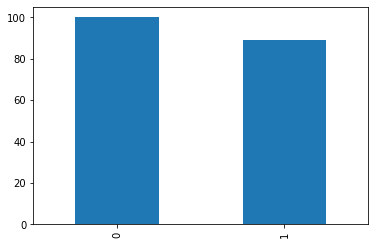

In [27]:
hairpin_data['class'].value_counts().sort_index().plot.bar()

In [28]:
# Splitting the human dataset into the training set and test set
from sklearn.model_selection import train_test_split
bow_X_train, bow_X_test, bow_y_train, bow_y_test = train_test_split(bow_X, 
                                                    y_data, 
                                                    test_size = 0.20, 
                                                    random_state=42,
                                                    shuffle=True)
ngram_X_train, ngram_X_test, ngram_y_train, ngram_y_test = train_test_split(ngram_X, 
                                                    y_data, 
                                                    test_size = 0.20, 
                                                    random_state=42,
                                                    shuffle=True)
tfidf_X_train, tfidf_X_test, tfidf_y_train, tfidf_y_test = train_test_split(tfidf_X, 
                                                    y_data, 
                                                    test_size = 0.20, 
                                                    random_state=42,
                                                    shuffle=True)

In [29]:
print(bow_X_train.shape)
print(bow_X_test.shape)

(151, 1020)
(38, 1020)


In [30]:
print(bow_y_test.sum())
print(ngram_y_test.sum())
print(tfidf_y_test.sum())

18
18
18


In [31]:
print("Baseline accuracy = %.2f " %(100*20/38))

Baseline accuracy = 52.63 


## Hyper Parameter Optimization

### BoW's k-mer

In [32]:
bow_X_training, bow_X_cv, bow_y_training, bow_y_cv = train_test_split(bow_X_train, 
                                                    bow_y_train, 
                                                    test_size = 0.25, 
                                                    random_state=42,
                                                    shuffle=True)

In [33]:
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics

mdl=MultinomialNB().fit(bow_X_training, bow_y_training)
predictions = mdl.predict(bow_X_cv)
mcc = metrics.matthews_corrcoef(bow_y_cv, predictions, sample_weight=None)
print(mcc)

0.2621269092188047


### N-gram's N

In [34]:
ngram_X_training, ngram_X_cv, ngram_y_training, ngram_y_cv = train_test_split(ngram_X_train, 
                                                    ngram_y_train, 
                                                    test_size = 0.25, 
                                                    random_state=42,
                                                    shuffle=True)

In [35]:
mdl=MultinomialNB().fit(ngram_X_training, ngram_y_training)
predictions = mdl.predict(ngram_X_cv)
mcc = metrics.matthews_corrcoef(ngram_y_cv, predictions, sample_weight=None)
print(mcc)

0.27608872259967787


## Model Training

In [36]:
from sklearn import metrics

def get_metrics(testing_labels, predictions):
    cmat=metrics.confusion_matrix(testing_labels, predictions)
    cm = pd.crosstab(pd.Series(testing_labels, name='Actual'), pd.Series(predictions, name='Predicted'))
    accuracy = metrics.accuracy_score(testing_labels, predictions)
    ck = metrics.cohen_kappa_score(testing_labels, predictions)
    precision = metrics.precision_score(testing_labels, predictions, average='weighted')
    recall = metrics.recall_score(testing_labels, predictions, average='weighted')
    f1 = metrics.f1_score(testing_labels, predictions, average='weighted')
    mcc = metrics.matthews_corrcoef(testing_labels, predictions, sample_weight=None)
    return cmat, cm, accuracy, ck, precision, recall, f1, mcc

def train_model(classifier, training_data, training_labels, testing_data):
    classifier.fit(training_data, training_labels)
    predictions = classifier.predict(testing_data)
    return predictions

In [37]:
f = open("perf.txt","w")

In [42]:
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import MultinomialNB
from xgboost import XGBClassifier

#Chose a few popular classifiers for text classification
classifiers = [LogisticRegression(), SGDClassifier(), KNeighborsClassifier(), MultinomialNB(), DecisionTreeClassifier()]
label = list()
cm  = list()
acc = list()
ck  = list()
pre = list()
rec = list()
f1  = list()
mcc = list()
ngram_pred = list()

for classifier in classifiers:
    bow_y_pred = train_model(classifier, bow_X_train, bow_y_train, bow_X_test)
    bow_cmat, bow_cm, bow_accuracy, bow_ck, bow_precision, bow_recall, bow_f1, bow_mcc = get_metrics(bow_y_test, bow_y_pred)
    label.append("BOW " + classifier.__class__.__name__)
    cm.append(bow_cm)
    acc.append(bow_accuracy)
    ck.append(bow_ck)
    pre.append(bow_precision)
    rec.append(bow_recall)
    f1.append(bow_f1)
    mcc.append(bow_mcc)
    
    ngram_y_pred = train_model(classifier, ngram_X_train, ngram_y_train, ngram_X_test)
    ngram_cmat, ngram_cm, ngram_accuracy, ngram_ck, ngram_precision, ngram_recall, ngram_f1, ngram_mcc = get_metrics(ngram_y_test, ngram_y_pred)
    label.append("BOW N-GRAM " + classifier.__class__.__name__)
    cm.append(ngram_cm)
    acc.append(ngram_accuracy)
    ck.append(ngram_ck)
    pre.append(ngram_precision)
    rec.append(ngram_recall)
    f1.append(ngram_f1)
    mcc.append(ngram_mcc)
    ngram_pred.append(ngram_y_pred)
    
    tfidf_y_pred = train_model(classifier, tfidf_X_train, tfidf_y_train, tfidf_X_test)
    tfidf_cmat, tfidf_cm, tfidf_accuracy, tfidf_ck, tfidf_precision, tfidf_recall, tfidf_f1, tfidf_mcc = get_metrics(tfidf_y_test, tfidf_y_pred)
    label.append("TFIDF " + classifier.__class__.__name__)
    cm.append(tfidf_cm)
    acc.append(tfidf_accuracy)
    ck.append(tfidf_ck)
    pre.append(tfidf_precision)
    rec.append(tfidf_recall)
    f1.append(tfidf_f1)
    mcc.append(tfidf_mcc)
    
    print(classifier.__class__.__name__)
    print("BOW:")
    print(bow_cm)
    print("\t\t\taccuracy = %.2f cohens_kappa = %.2f precision = %.2f recall = %.2f f1 = %.2f mcc = %.2f" % (bow_accuracy, bow_ck, bow_precision, bow_recall, bow_f1, bow_mcc))
    print("NGRAM:")
    print(ngram_cm)
    print("\t\t\taccuracy = %.2f cohens_kappa = %.2f precision = %.2f recall = %.2f f1 = %.2f mcc = %.2f" % (ngram_accuracy, ngram_ck, ngram_precision, ngram_recall, ngram_f1, ngram_mcc))
    print("TFIDF:")
    print(tfidf_cm)
    print("\t\t\taccuracy = %.2f cohens_kappa = %.2f precision = %.2f recall = %.2f f1 = %.2f mcc = %.2f" % (tfidf_accuracy, tfidf_ck, tfidf_precision, tfidf_recall, tfidf_f1, ngram_mcc))
    print("\n")
    
    f.write("%.2f\t%.2f\t%.2f\t%.2f\t%.2f\t%.2f\n" % (bow_accuracy, bow_ck, bow_precision, bow_recall, bow_f1, bow_mcc))
    f.write("%.2f\t%.2f\t%.2f\t%.2f\t%.2f\t%.2f\n" % (ngram_accuracy, ngram_ck, ngram_precision, ngram_recall, ngram_f1, ngram_mcc))
    f.write("%.2f\t%.2f\t%.2f\t%.2f\t%.2f\t%.2f\n" % (tfidf_accuracy, tfidf_ck, tfidf_precision, tfidf_recall, tfidf_f1, ngram_mcc))

LogisticRegression
BOW:
Predicted   0   1
Actual           
0          13   7
1           7  11
			accuracy = 0.63 cohens_kappa = 0.26 precision = 0.63 recall = 0.63 f1 = 0.63 mcc = 0.26
NGRAM:
Predicted   0  1
Actual          
0          18  2
1           9  9
			accuracy = 0.71 cohens_kappa = 0.41 precision = 0.74 recall = 0.71 f1 = 0.70 mcc = 0.44
TFIDF:
Predicted   0  1
Actual          
0          15  5
1          12  6
			accuracy = 0.55 cohens_kappa = 0.08 precision = 0.55 recall = 0.55 f1 = 0.53 mcc = 0.44


SGDClassifier
BOW:
Predicted   0   1
Actual           
0          13   7
1           6  12
			accuracy = 0.66 cohens_kappa = 0.32 precision = 0.66 recall = 0.66 f1 = 0.66 mcc = 0.32
NGRAM:
Predicted   0   1
Actual           
0          14   6
1           7  11
			accuracy = 0.66 cohens_kappa = 0.31 precision = 0.66 recall = 0.66 f1 = 0.66 mcc = 0.31
TFIDF:
Predicted   0   1
Actual           
0          15   5
1           8  10
			accuracy = 0.66 cohens_kappa = 0.31 precision

In [43]:
f.close()

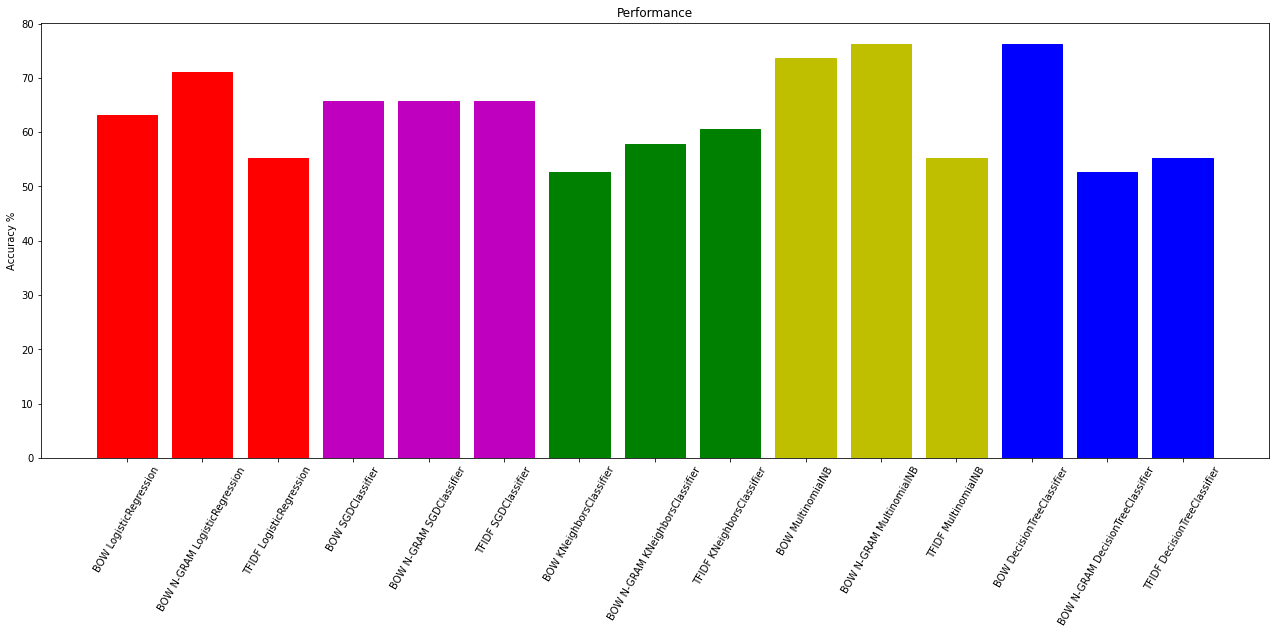

In [44]:
index = np.arange(len(label))
plt.figure(figsize=(22,8))
accuracy_results = [i * 100 for i in acc]
bars = plt.bar(index, accuracy_results)

plt.ylabel('Accuracy %')
plt.xticks(index, label, rotation=60)
plt.title('Performance')

colors = ['r']*3 + ['m']*3 + ['g']*3 + ['y']*3 + ['b']*3 + ['k']*3 + ['c']*3
for item, color in zip(bars, colors):
     item.set_color(color)
plt.show()

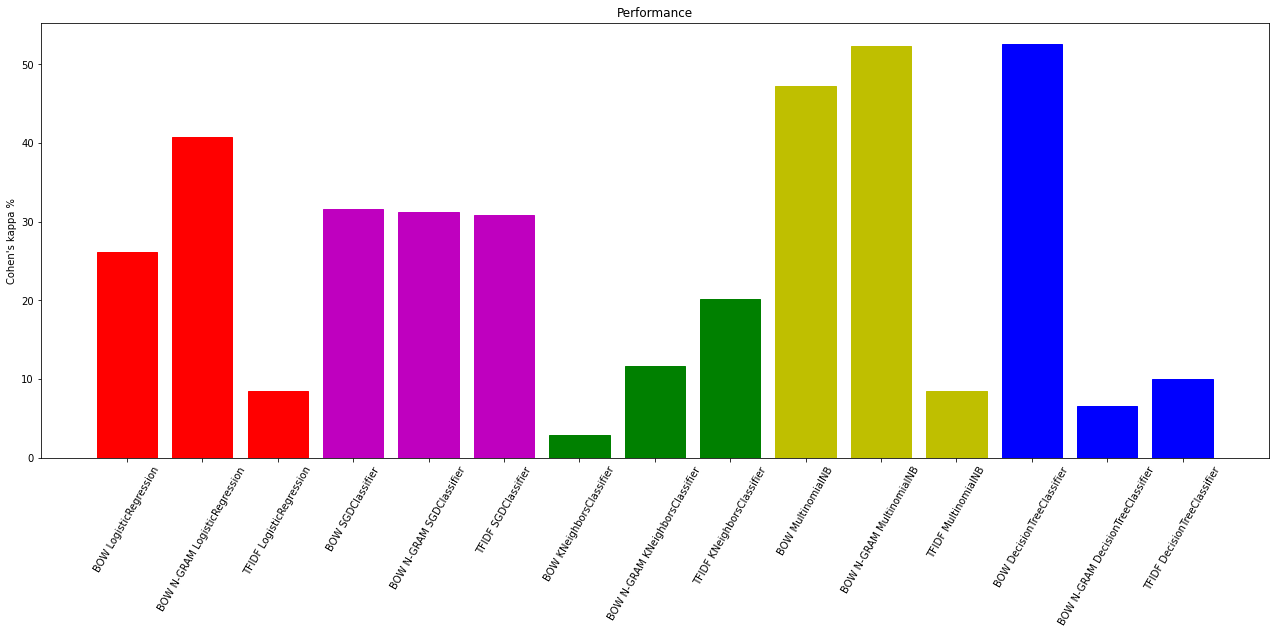

In [45]:
index = np.arange(len(label))
plt.figure(figsize=(22,8))
cohens_kappa_results = [i * 100 for i in ck]
bars = plt.bar(index, cohens_kappa_results)

plt.ylabel('Cohen\'s kappa %')
plt.xticks(index, label, rotation=60)
plt.title('Performance')

colors = ['r']*3 + ['m']*3 + ['g']*3 + ['y']*3 + ['b']*3 + ['k']*3 + ['c']*3
for item, color in zip(bars, colors):
     item.set_color(color)
plt.show()

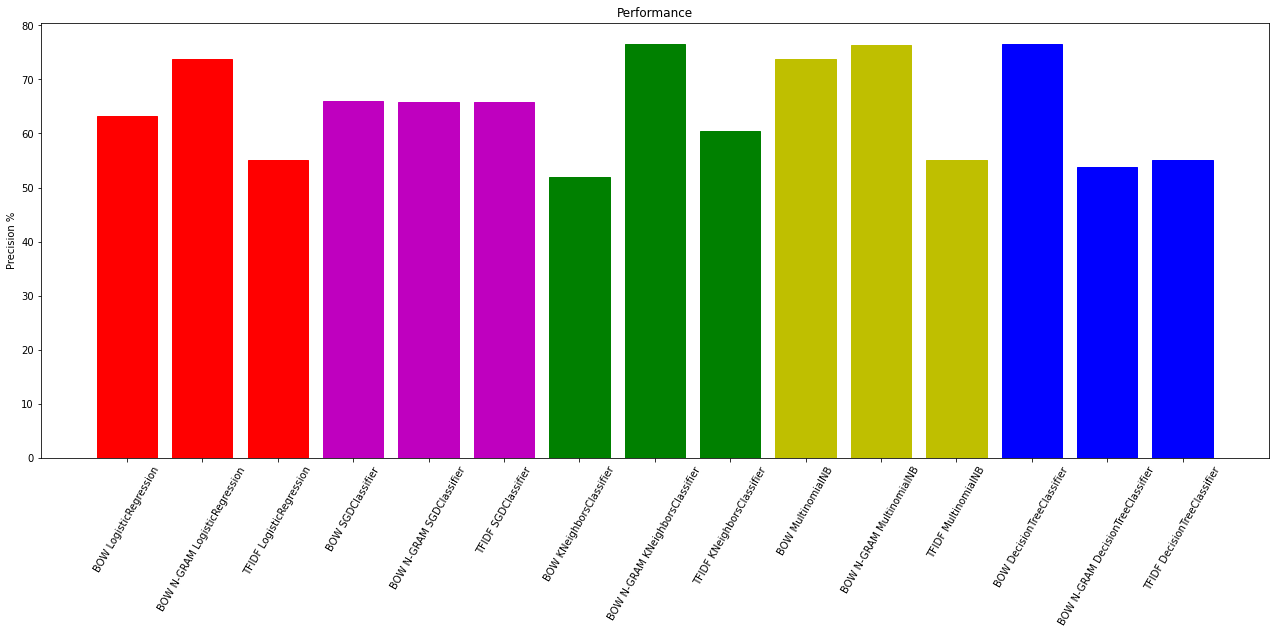

In [46]:
index = np.arange(len(label))
plt.figure(figsize=(22,8))
precision_results = [i * 100 for i in pre]
bars = plt.bar(index, precision_results)

plt.ylabel('Precision %')
plt.xticks(index, label, rotation=60)
plt.title('Performance')

colors = ['r']*3 + ['m']*3 + ['g']*3 + ['y']*3 + ['b']*3 + ['k']*3 + ['c']*3
for item, color in zip(bars, colors):
     item.set_color(color)
plt.show()

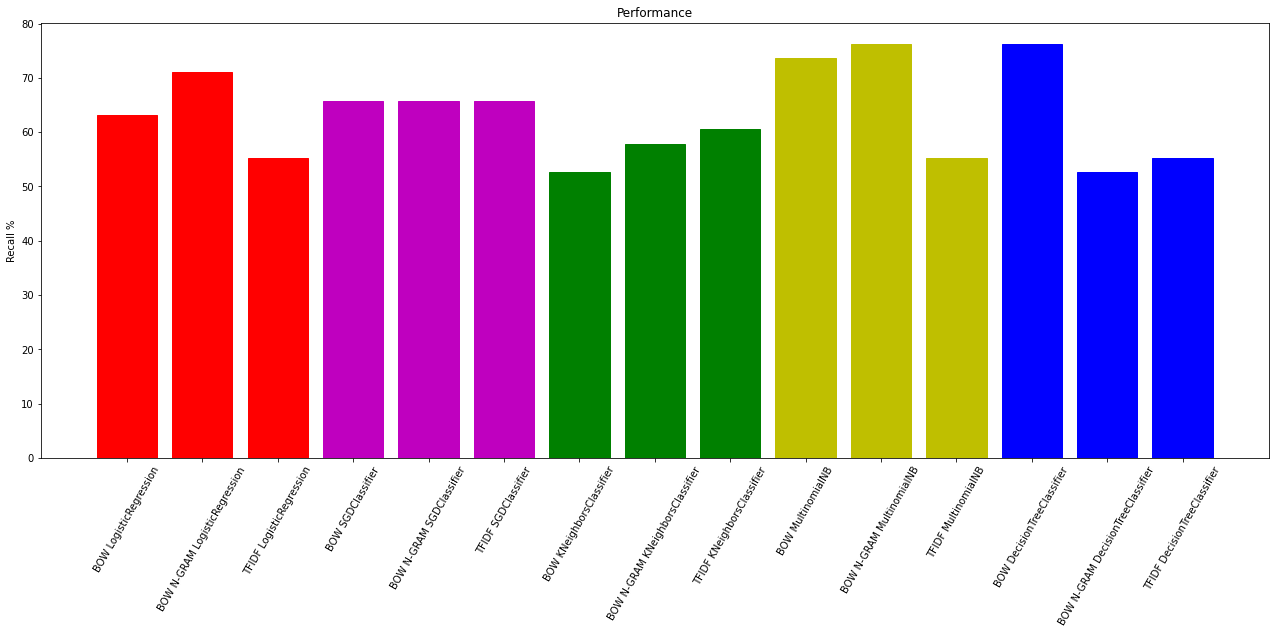

In [47]:
index = np.arange(len(label))
plt.figure(figsize=(22,8))
recall_results = [i * 100 for i in rec]
bars = plt.bar(index, recall_results)

plt.ylabel('Recall %')
plt.xticks(index, label, rotation=60)
plt.title('Performance')

colors = ['r']*3 + ['m']*3 + ['g']*3 + ['y']*3 + ['b']*3 + ['k']*3 + ['c']*3
for item, color in zip(bars, colors):
     item.set_color(color)
plt.show()

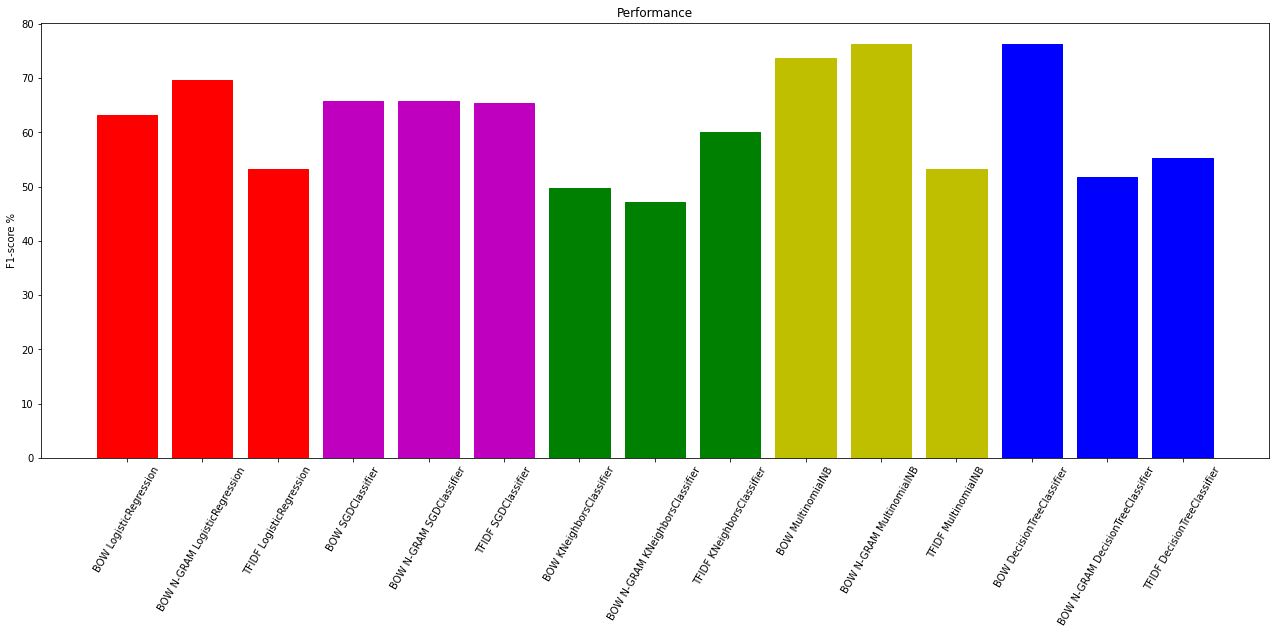

In [48]:
index = np.arange(len(label))
plt.figure(figsize=(22,8))
f1_results = [i * 100 for i in f1]
bars = plt.bar(index, f1_results)

plt.ylabel('F1-score %')
plt.xticks(index, label, rotation=60)
plt.title('Performance')

colors = ['r']*3 + ['m']*3 + ['g']*3 + ['y']*3 + ['b']*3 + ['k']*3 + ['c']*3
for item, color in zip(bars, colors):
     item.set_color(color)
plt.show()

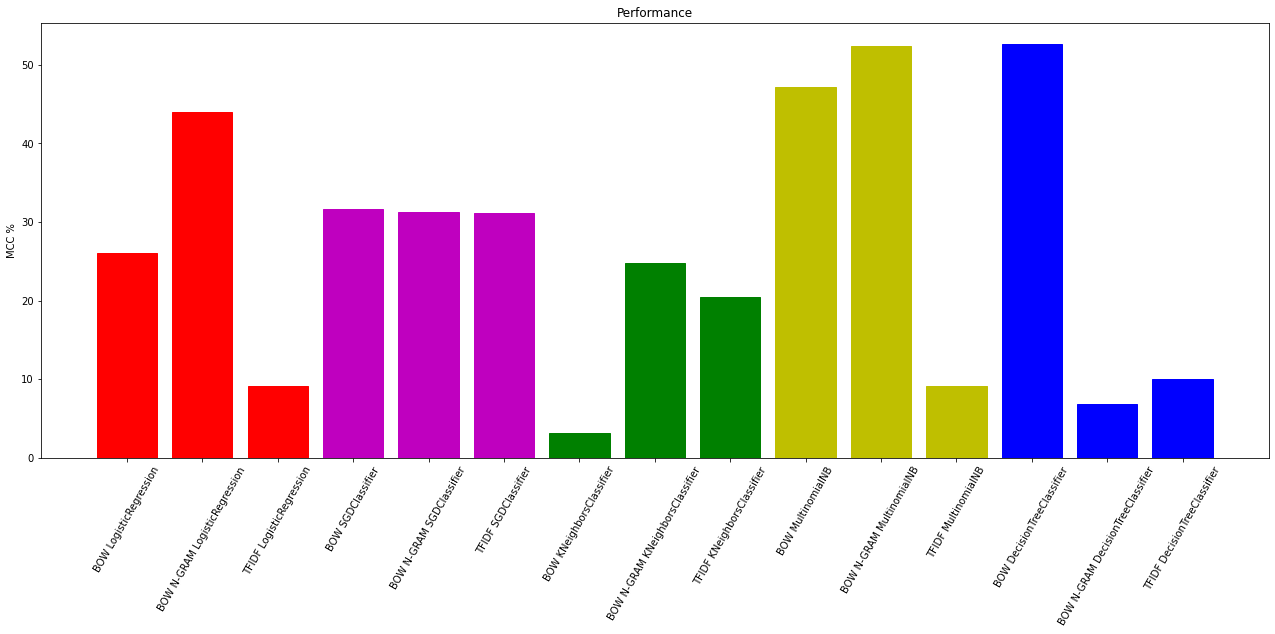

In [49]:
index = np.arange(len(label))
plt.figure(figsize=(22,8))
mcc_results = [i * 100 for i in mcc]
bars = plt.bar(index, mcc_results)

plt.ylabel('MCC %')
plt.xticks(index, label, rotation=60)
plt.title('Performance')

colors = ['r']*3 + ['m']*3 + ['g']*3 + ['y']*3 + ['b']*3 + ['k']*3 + ['c']*3
for item, color in zip(bars, colors):
     item.set_color(color)
plt.show()

## Bagging Method - concensus

In [50]:
ensmbl_pred=(ngram_pred[0]+ngram_pred[1]+ngram_pred[3])/3
ensmbl_pred[ensmbl_pred>=0.5]=1
ensmbl_pred[ensmbl_pred<0.5]=0

esmbl_cmat, esmbl_cm, esmbl_accuracy, esmbl_ck, esmbl_precision, esmbl_recall, esmbl_f1, esmbl_mcc = get_metrics(ngram_y_test, ensmbl_pred)

print("Ensembl of Ngrams:")
print(esmbl_cm)
print("\t\t\taccuracy = %.3f cohens_kappa = %.3f precision = %.3f recall = %.3f f1 = %.3f mcc = %.3f" % (esmbl_accuracy, esmbl_ck, esmbl_precision, esmbl_recall, esmbl_f1, esmbl_mcc))

Ensembl of Ngrams:
Predicted  0.00  1.00
Actual               
0            16     4
1             7    11
			accuracy = 0.711 cohens_kappa = 0.415 precision = 0.714 recall = 0.711 f1 = 0.707 mcc = 0.420


In [51]:
ensmbl_pred=(ngram_pred[0]+ngram_pred[3])/2
ensmbl_pred[ensmbl_pred>=0.5]=1
ensmbl_pred[ensmbl_pred<0.5]=0

esmbl_cmat, esmbl_cm, esmbl_accuracy, esmbl_ck, esmbl_precision, esmbl_recall, esmbl_f1, esmbl_mcc = get_metrics(ngram_y_test, ensmbl_pred)

print("Ensembl of Ngrams:")
print(esmbl_cm)
print("\t\t\taccuracy = %.2f cohens_kappa = %.2f precision = %.2f recall = %.2f f1 = %.2f mcc = %.2f" % (esmbl_accuracy, esmbl_ck, esmbl_precision, esmbl_recall, esmbl_f1, esmbl_mcc))

Ensembl of Ngrams:
Predicted  0.00  1.00
Actual               
0            16     4
1             5    13
			accuracy = 0.76 cohens_kappa = 0.52 precision = 0.76 recall = 0.76 f1 = 0.76 mcc = 0.52


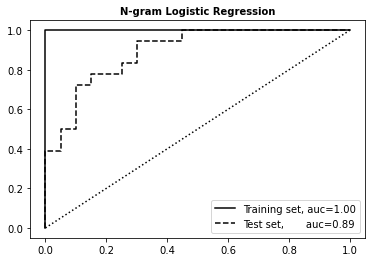

In [52]:
clf=LogisticRegression().fit(ngram_X_train, ngram_y_train)
ngram_y_train_pred = clf.predict_proba(ngram_X_train)
ngram_y_test_pred = clf.predict_proba(ngram_X_test)
auc_train = metrics.roc_auc_score(ngram_y_train, ngram_y_train_pred[:,1])
auc_test = metrics.roc_auc_score(ngram_y_test, ngram_y_test_pred[:,1])
plt.title('N-gram Logistic Regression', fontweight='bold', fontsize=10)
plt.plot([0,1], [0,1], color='black', linestyle=':')
fpr, tpr, _ = metrics.roc_curve(ngram_y_train, ngram_y_train_pred[:,1])
plt.plot(fpr,tpr,label="Training set, auc="+"%.2f"%(auc_train), color='black')
fpr, tpr, _ = metrics.roc_curve(ngram_y_test, ngram_y_test_pred[:,1])
plt.plot(fpr,tpr,label="Test set,       auc="+"%.2f"%(auc_test), color='black', linestyle='--')
plt.legend(loc=4)
plt.show()

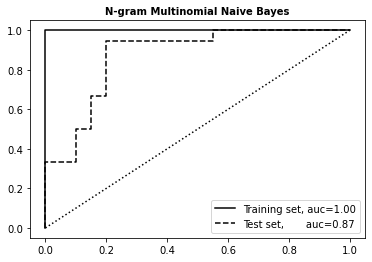

In [53]:
clf=MultinomialNB().fit(ngram_X_train, ngram_y_train)
ngram_y_train_pred = clf.predict_proba(ngram_X_train)
ngram_y_test_pred = clf.predict_proba(ngram_X_test)
auc_train = metrics.roc_auc_score(ngram_y_train, ngram_y_train_pred[:,1])
auc_test = metrics.roc_auc_score(ngram_y_test, ngram_y_test_pred[:,1])
plt.title('N-gram Multinomial Naive Bayes', fontweight='bold', fontsize=10)
plt.plot([0,1], [0,1], color='black', linestyle=':')
fpr, tpr, _ = metrics.roc_curve(ngram_y_train, ngram_y_train_pred[:,1])
plt.plot(fpr,tpr,label="Training set, auc="+"%.2f"%(auc_train), color='black')
fpr, tpr, _ = metrics.roc_curve(ngram_y_test, ngram_y_test_pred[:,1])
plt.plot(fpr,tpr,label="Test set,       auc="+"%.2f"%(auc_test), color='black', linestyle='--')
plt.legend(loc=4)
plt.show()

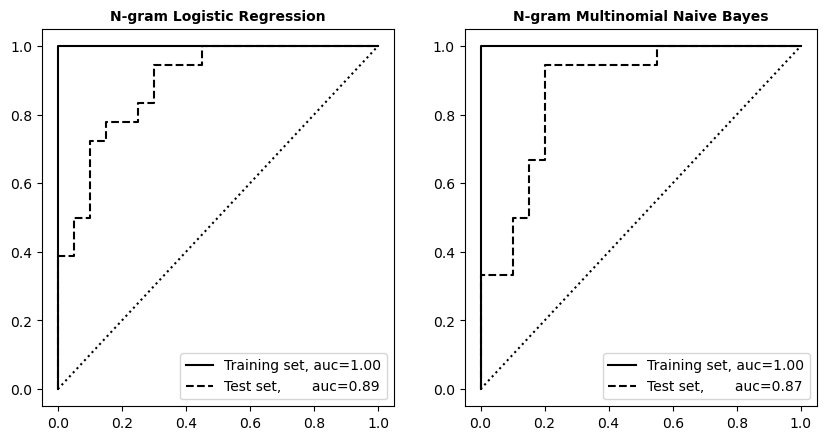

In [54]:
plt.figure(figsize=(10, 5), dpi=100)

clf=LogisticRegression().fit(ngram_X_train, ngram_y_train)
ngram_y_train_pred = clf.predict_proba(ngram_X_train)
ngram_y_test_pred = clf.predict_proba(ngram_X_test)
auc_train = metrics.roc_auc_score(ngram_y_train, ngram_y_train_pred[:,1])
auc_test = metrics.roc_auc_score(ngram_y_test, ngram_y_test_pred[:,1])
plt.subplot(1, 2, 1)
plt.title('N-gram Logistic Regression', fontweight='bold', fontsize=10)
plt.plot([0,1], [0,1], color='black', linestyle=':')
fpr, tpr, _ = metrics.roc_curve(ngram_y_train, ngram_y_train_pred[:,1])
plt.plot(fpr,tpr,label="Training set, auc="+"%.2f"%(auc_train), color='black')
fpr, tpr, _ = metrics.roc_curve(ngram_y_test, ngram_y_test_pred[:,1])
plt.plot(fpr,tpr,label="Test set,       auc="+"%.2f"%(auc_test), color='black', linestyle='--')
plt.legend(loc=4)

clf=MultinomialNB().fit(ngram_X_train, ngram_y_train)
ngram_y_train_pred = clf.predict_proba(ngram_X_train)
ngram_y_test_pred = clf.predict_proba(ngram_X_test)
auc_train = metrics.roc_auc_score(ngram_y_train, ngram_y_train_pred[:,1])
auc_test = metrics.roc_auc_score(ngram_y_test, ngram_y_test_pred[:,1])
plt.subplot(1, 2, 2)
plt.title('N-gram Multinomial Naive Bayes', fontweight='bold', fontsize=10)
plt.plot([0,1], [0,1], color='black', linestyle=':')
fpr, tpr, _ = metrics.roc_curve(ngram_y_train, ngram_y_train_pred[:,1])
plt.plot(fpr,tpr,label="Training set, auc="+"%.2f"%(auc_train), color='black')
fpr, tpr, _ = metrics.roc_curve(ngram_y_test, ngram_y_test_pred[:,1])
plt.plot(fpr,tpr,label="Test set,       auc="+"%.2f"%(auc_test), color='black', linestyle='--')
plt.legend(loc=4)
plt.show()

In [87]:
cv = CountVectorizer(ngram_range=(3,3))
ngram_X = cv.fit_transform(hairpin_texts)

mdl=LogisticRegression().fit(ngram_X, y_data)

In [88]:
import pickle
pickle.dump(mdl, open("mdl.sav", "wb"))

In [89]:
ld_mdl=pickle.load(open("mdl.sav","rb"))
resl = ld_mdl.score(ngram_X, y_data)
print(resl)

1.0


In [90]:
hairpin.head()

,id_hairpin,seq_hairpin
0,cel-let-7,UACACUGUGGAUCCGGUGAGGUAGUAGGUUGUAUAGUUUGGAAUAU...
1,cel-lin-4,AUGCUUCCGGCCUGUUCCCUGAGACCUCAAGUGUGAGUGUACUAUU...
2,cel-mir-1,AAAGUGACCGUACCGAGCUGCAUACUUCCUUACAUGCCCAUACUAU...
3,cel-mir-2,UAAACAGUAUACAGAAAGCCAUCAAAGCGGUGGUUGAUGUGUUGCA...
4,cel-mir-34,CGGACAAUGCUCGAGAGGCAGUGUGGUUAGCUGGUUGCAUAUUUCC...


In [91]:
hsa=hairpin[hairpin['id_hairpin'].str.contains("hsa")]
hsa.head()

,id_hairpin,seq_hairpin
57,hsa-let-7a-1,UGGGAUGAGGUAGUAGGUUGUAUAGUUUUAGGGUCACACCCACCAC...
58,hsa-let-7a-2,AGGUUGAGGUAGUAGGUUGUAUAGUUUAGAAUUACAUCAAGGGAGA...
59,hsa-let-7a-3,GGGUGAGGUAGUAGGUUGUAUAGUUUGGGGCUCUGCCCUGCUAUGG...
60,hsa-let-7b,CGGGGUGAGGUAGUAGGUUGUGUGGUUUCAGGGCAGUGAUGUUGCC...
61,hsa-let-7c,GCAUCCGGGUUGAGGUAGUAGGUUGUAUGGUUUAGAGUUACACCCU...


In [92]:
hsa['seq_hairpin']

57       UGGGAUGAGGUAGUAGGUUGUAUAGUUUUAGGGUCACACCCACCAC...
58       AGGUUGAGGUAGUAGGUUGUAUAGUUUAGAAUUACAUCAAGGGAGA...
59       GGGUGAGGUAGUAGGUUGUAUAGUUUGGGGCUCUGCCCUGCUAUGG...
60       CGGGGUGAGGUAGUAGGUUGUGUGGUUUCAGGGCAGUGAUGUUGCC...
61       GCAUCCGGGUUGAGGUAGUAGGUUGUAUGGUUUAGAGUUACACCCU...
                               ...                        
37307    UUAACAUCUUUUCCAUCAUAAUUCUCAUAGUAAUAAUAGUAAUGUU...
37308    GAAGUGUACUUUUUAAUGGUGCCAAACAGCAGUUGAUCUAUAAUAA...
37312    UGUGGAUAUUCUUUUUUGAUACUACAGCAAAACUCAGCAAGUUGUA...
37313    GAAAAAGUCAUGGAGGCCAUGGGGUUGGCUUGAAACCAGCUUUGGG...
38585    GCAGGGAAAGGGAACCCAGAAAUCUGGUAUGCCAGCAAAGAGAGUA...
Name: seq_hairpin, Length: 1917, dtype: object

In [93]:
hsa['words'] = hsa.apply(lambda x: getKmers(x['seq_hairpin'], 5), axis=1)
hsa = hsa.drop('seq_hairpin', axis=1)
hsa.head()

/var/folders/91/plww02hn02dcgq2mr321qy9w0000gn/T/ipykernel_20628/491799193.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hsa['words'] = hsa.apply(lambda x: getKmers(x['seq_hairpin'], 5), axis=1)


,id_hairpin,words
57,hsa-let-7a-1,"[uggga, gggau, ggaug, gauga, augag, ugagg, gag..."
58,hsa-let-7a-2,"[agguu, gguug, guuga, uugag, ugagg, gaggu, agg..."
59,hsa-let-7a-3,"[gggug, gguga, gugag, ugagg, gaggu, aggua, ggu..."
60,hsa-let-7b,"[cgggg, ggggu, gggug, gguga, gugag, ugagg, gag..."
61,hsa-let-7c,"[gcauc, caucc, auccg, uccgg, ccggg, cgggu, ggg..."


In [94]:
hsa_texts = list(hsa['words'])
for item in range(len(hsa_texts)):
    hsa_texts[item] = ' '.join(hsa_texts[item])
hsa_texts[1]

'agguu gguug guuga uugag ugagg gaggu aggua gguag guagu uagua aguag guagg uaggu agguu gguug guugu uugua uguau guaua uauag auagu uaguu aguuu guuua uuuag uuaga uagaa agaau gaauu aauua auuac uuaca uacau acauc cauca aucaa ucaag caagg aaggg aggga gggag ggaga gagau agaua gauaa auaac uaacu aacug acugu cugua uguac guaca uacag acagc cagcc agccu gccuc ccucc cuccu uccua ccuag cuagc uagcu agcuu gcuuu cuuuc uuucc uuccu'

In [95]:
ngram_hsa = cv.transform(hsa_texts)

In [96]:
predictions = ld_mdl.predict(ngram_hsa)

In [102]:
unique, counts = np.unique(predictions, return_counts=True)
print(np.asarray((unique, counts)).T)

[[   0 1265]
 [   1  652]]


In [104]:
hsa['pred']=predictions
hsa.head()

,id_hairpin,words,pred
57,hsa-let-7a-1,"[uggga, gggau, ggaug, gauga, augag, ugagg, gag...",0
58,hsa-let-7a-2,"[agguu, gguug, guuga, uugag, ugagg, gaggu, agg...",0
59,hsa-let-7a-3,"[gggug, gguga, gugag, ugagg, gaggu, aggua, ggu...",0
60,hsa-let-7b,"[cgggg, ggggu, gggug, gguga, gugag, ugagg, gag...",0
61,hsa-let-7c,"[gcauc, caucc, auccg, uccgg, ccggg, cgggu, ggg...",0


In [108]:
id_emt=hsa[hsa.pred==1].id_hairpin

In [111]:
id_emt.to_csv("id_emt.txt", index=False)